# 딥러닝 구조 연습4-이미지

* 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 

## 라이브러리 로드

In [1]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 차원확인 : 훈련용
train_images.shape, train_labels.shape

In [ ]:
# 차원확인 : 검증용
test_images.shape, test_labels.shape

In [ ]:
train_images.ndim

## 데이터 준비

In [20]:
# 데이터 전처리까지 진행 : 정규화
train_scaled = train_images/255.0 # 0~1 사이의 수로 정규화
test_scaled = test_images/255.0 

In [21]:
train_scaled = train_scaled.reshape(-1, 28*28) #3차원 -> 2차원
test_scaled = test_scaled.reshape(-1, 28*28)

In [22]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

In [ ]:
test_images.shape

## 딥러닝 구성하기

In [23]:
from tensorflow.keras.layers import Flatten,Dropout


def model_fn():
    model = Sequential()
    model.add(Flatten(input_shape = (784,))) # reshape 대신에 사용가능
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax')) # 클래스가 10가지 분류이니까 노드가 10개. 다중분류이기때문에 소프트맥스함수
    return model

In [24]:
model = model_fn()


## 딥러닝 설정하기

In [25]:
#손실함수
#옵티마이저:경사하강법 종류
#평가방법

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dropout_8 (Dropout)         (None, 50)               

## 모델 최적화 설정

* 콜백: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* ModelCheckpoint(): 최상의 검증 점수를 만드는 그 때 당시의 가중치와 모델 구조를 저장
* EarlyStopping():검증 점수가 제일 낮을 때, 학습을 중단하여 과적합이 시작되기 전에 훈련을 미리 중지(자원 절약)




In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ## 코랩을 사용할 때
# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [26]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장


#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지

checkpoint_cb = ModelCheckpoint(modelpath,save_best_only=True)

early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.


## 딥러닝 훈련하기

In [27]:
# 128개 샘플씩 미니 배치로 훈련 데이터 다섯 번 반복

history = model.fit(train_scaled, train_labels, epochs=100, verbose=1,
                    validation_split = 0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    batch_size = 128)

Epoch 1/100
329/329 [==============================] - 2s 4ms/step - loss: 0.6359 - accuracy: 0.8016 - val_loss: 0.2124 - val_accuracy: 0.9362
Epoch 2/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2594 - accuracy: 0.9255 - val_loss: 0.1549 - val_accuracy: 0.9534
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1974 - accuracy: 0.9425 - val_loss: 0.1347 - val_accuracy: 0.9601
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1641 - accuracy: 0.9528 - val_loss: 0.1213 - val_accuracy: 0.9634
Epoch 5/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1428 - accuracy: 0.9580 - val_loss: 0.1165 - val_accuracy: 0.9653
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1242 - accuracy: 0.9627 - val_loss: 0.1117 - val_accuracy: 0.9672
Epoch 7/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1141 - accuracy: 0.9662 - val_loss: 0.1099 - val_accuracy: 0.9694

In [28]:
# 몇 번째 에포크에서 훈련이 중지 되었는지..
early_stopping_cb.stopped_epoch

17

## 평가하기

In [29]:
test_scaled = test_images/255.0
test_scaled = test_scaled.reshape(-1, 784)

model.evaluate(test_scaled, test_labels)
# model.evaluate(val_scaled, y_val)

313/313 [==============================] - 0s 874us/step - loss: 0.0833 - accuracy: 0.9761


[0.0832790657877922, 0.9761000275611877]

테스트 세트의 정확도는 98.2%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 
약간의 과대적합이 보입니다. 

## 시각화하기

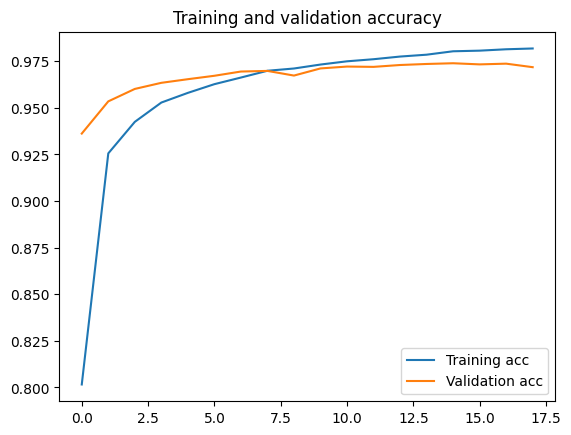

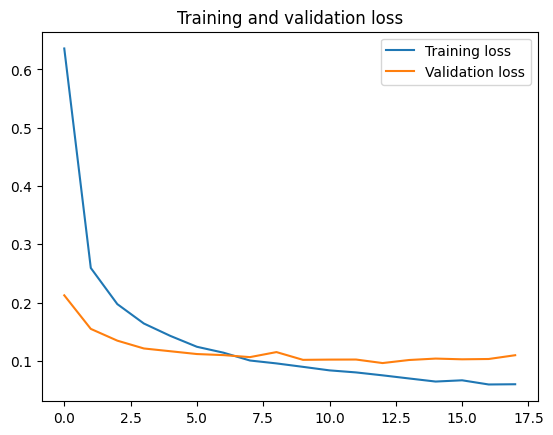

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 전체 코드

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스



In [ ]:
# 0.라이브러리 로드
import numpy as np
from keras.datasets import mnist
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 1.데이터 전처리
train_scaled = train_images/255.0 # 0~1 사이의 수로 정규화
test_scaled = test_images/255.0 

train_scaled = train_scaled.reshape(-1, 28*28) #3차원 -> 2차원
test_scaled = test_scaled.reshape(-1, 28*28)

from tensorflow.keras.utils import to_categorical #원-핫인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2.딥러닝 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout


def model_fn():
    model = Sequential()
    model.add(Flatten(input_shape = (784,))) # reshape 대신에 사용가능
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax')) # 클래스가 10가지 분류이니까 노드가 10개. 다중분류이기때문에 소프트맥스함수
    return model

model = model_fn()

# 3.딥러닝 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

# 4.모델 최적화 설정
from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"
checkpoint_cb = ModelCheckpoint(modelpath,save_best_only=True) #베스트모델 저장 : 검증점수의 성능이 향상 되었을 때만 저장
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True) 
#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지 # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.



# 5. 딥러닝 훈련 # 128개 샘플씩 미니 배치로 훈련 데이터 다섯 번 반복
history = model.fit(train_scaled, train_labels, epochs=100, verbose=1,
                    validation_split = 0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    batch_size = 128)

# 몇 번째 에포크에서 훈련이 중지되었는지 확인
early_stopping_cb.stopped_epoch

# 6. 평가하기
model.evaluate(test_scaled, test_labels)

# 7. 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 평가

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

ValueError: in user code:

    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)


---

## 진짜 내 손글씨 판단하기

* 28x28 픽셀 그림판 만들기 (가로 세로 비율 유지 체크 해제)
* 브러시로 숫자 쓰기
* 저장하기(png형태)

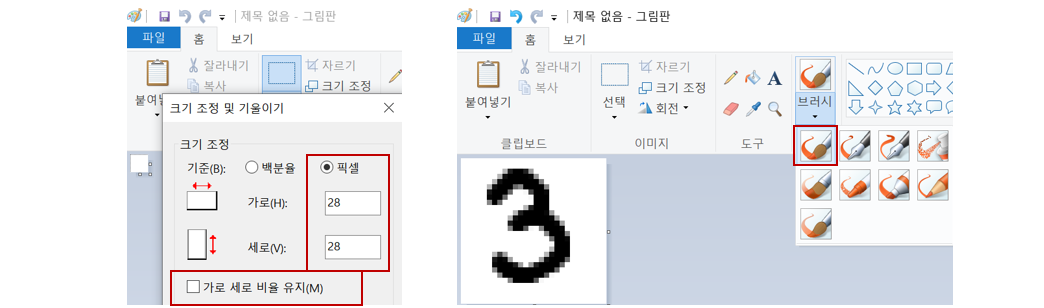

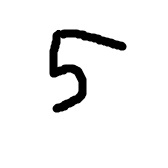

In [32]:
from PIL import Image
# Image.open("./image/3.png",)
Image.open("./image/5.jpg",)

In [ ]:
## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

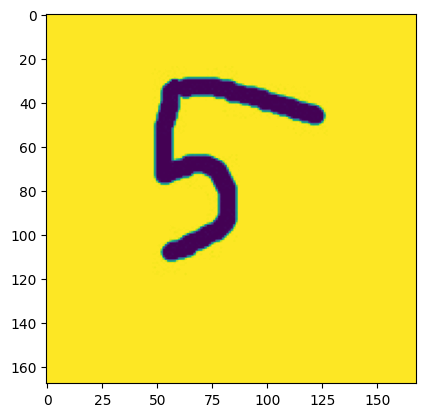

In [33]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/5.jpg").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


In [34]:
test_data

array([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0.

In [35]:
# 모델을 다시 읽어서 예측을 해보자

from tensorflow.keras.models import load_model
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 

result = model.predict(test_data)

1/1 [==============================] - 0s 75ms/step


In [36]:
result # 예측확률값이 리스트로 나온다

array([[0.06554325, 0.03494306, 0.03602811, 0.0871948 , 0.05516441,
        0.32129925, 0.04568841, 0.05852604, 0.15040316, 0.14520955]],
      dtype=float32)

In [37]:
# argmax로 제일 큰 인덱스 값을 추출
import numpy as np
np.argmax(result[0])  # 정답입니당ㅋㅋ

5

In [ ]:
# =======================================


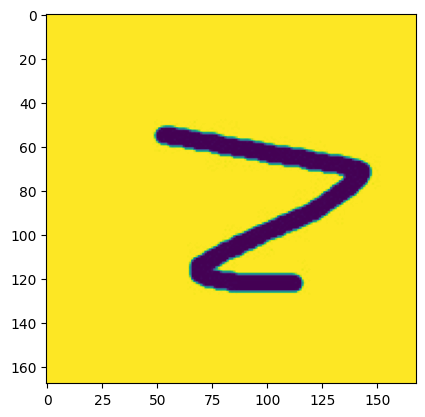

1/1 [==============================] - 0s 82ms/step


5

In [1]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# Image.open("./image/2.jpg",)

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/2.jpg").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))
# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


# 모델을 다시 읽어서 예측을 해보자
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 
result = model.predict(test_data)

# argmax로 제일 큰 인덱스 값을 추출
np.argmax(result[0])   # 틀렸다

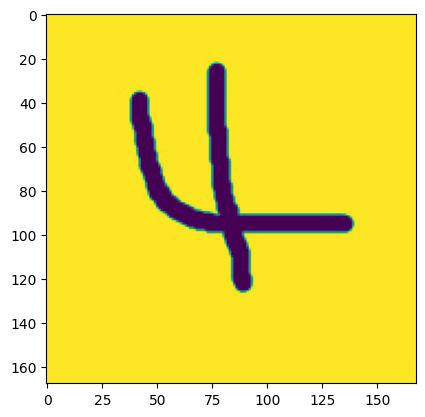

1/1 [==============================] - 0s 52ms/step


5

In [2]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/4.jpg").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))
# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


# 모델을 다시 읽어서 예측을 해보자
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 
result = model.predict(test_data)

# argmax로 제일 큰 인덱스 값을 추출
np.argmax(result[0])   # 또 틀렸다

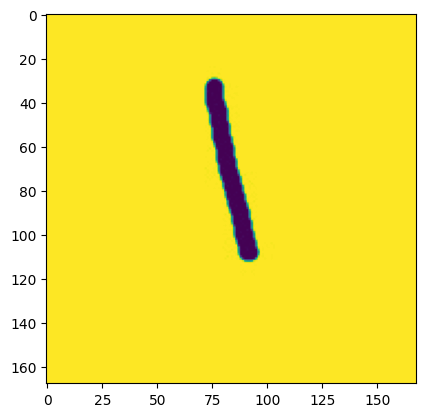

1/1 [==============================] - 0s 47ms/step


5

In [8]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# Image.open("./image/1.jpg",)

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/1.jpg").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))
# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


# 모델을 다시 읽어서 예측을 해보자
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 
# argmax로 제일 큰 인덱스 값을 추출
np.argmax(model.predict(test_data))   # 또 5만 나오지??

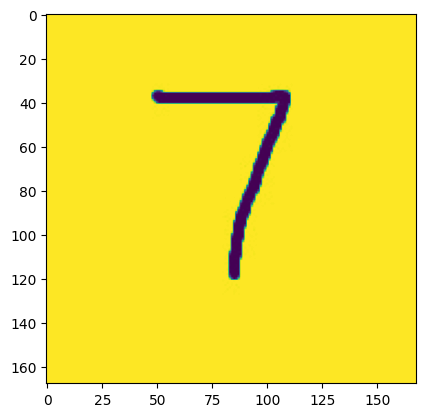

1/1 [==============================] - 0s 47ms/step


5

In [5]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt
# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# Image.open("./image/1.jpg",)

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/7.jpg").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))
# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


# 모델을 다시 읽어서 예측을 해보자
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 
result = model.predict(test_data)

# argmax로 제일 큰 인덱스 값을 추출
np.argmax(result[0]) # 왜 5만 나오지? 코드에 무슨 문제지??